# Customer Segmentation Clustering

Dalam Notebook ini, saya akan membuat analisis Clustering dari sebuah Customer berdasarkan :

1) Sex : Male:1, Female:0

2) Marital Status : Single : 0, Married : 1

3) Age : Umur Customer

4) Income : Pendapatan Tahunan

5) Occupation

6) Settlement Size 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style = 'darkgrid')

In [3]:
df = pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df1 = df.copy()

In [5]:
df1.drop(columns=['ID'], inplace=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [10]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [11]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,ID,int64,0,0.0,2000,"[100000555, 100001418, 100001584]",100.00
1,Sex,int64,0,0.0,2,[1],0.10
2,Marital status,int64,0,0.0,2,"[0, 1]",0.10
3,Age,int64,0,0.0,58,"[42, 40]",2.90
4,Education,int64,0,0.0,4,[1],0.20
5,Income,int64,0,0.0,1982,"[129975, 183108, 145174]",99.10
6,Occupation,int64,0,0.0,3,"[1, 0]",0.15
7,Settlement size,int64,0,0.0,3,"[2, 1, 0]",0.15


In [60]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [62]:
# Hopkins score
Hopkins_score=round(hopkins(df1),2)
Hopkins_score

0.94

In [7]:
df_cluster = df1

## K Means

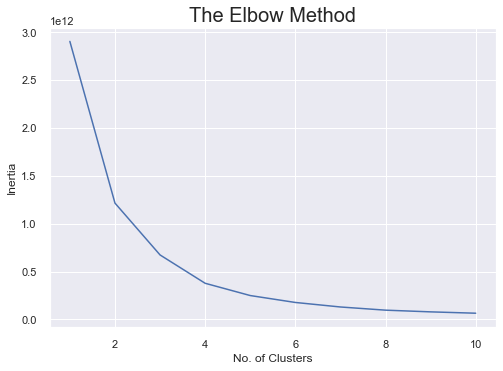

In [8]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_cluster)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


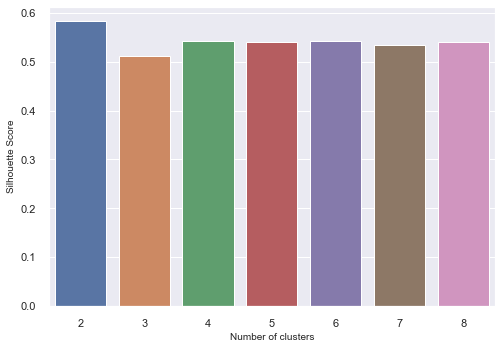

In [28]:
# silhouette coefficient
# standard: -1 s/d 1 => seberapa bagus model mendefinisikan cluster
from sklearn import metrics
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        metrics.silhouette_score(df_cluster, 
                                 KMeans(n_clusters = n_cluster).fit_predict(df_cluster))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plots = sns.barplot(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [30]:
silhouette_scores

[0.5834469003061407,
 0.5123353684139995,
 0.5428478909917674,
 0.5401417521080941,
 0.5424673243487905,
 0.53421732289491,
 0.5402461359198676]

In [19]:
km = KMeans(n_clusters = 2, random_state = 42)
cluster = km.fit_predict(df_cluster)

In [21]:
# mengetahui posisi centroids
center = km.cluster_centers_
center

array([[5.12407780e-01, 5.19114688e-01, 3.40348759e+01, 9.80549966e-01,
        1.03977474e+05, 6.15694165e-01, 5.52649229e-01],
       [2.94695481e-01, 4.30255403e-01, 4.13988212e+01, 1.20628684e+00,
        1.70684527e+05, 1.38113949e+00, 1.28487230e+00]])

In [22]:
df_cluster = df_cluster
df_cluster['cluster']=cluster

In [23]:
df_cluster

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,0
1998,1,1,24,1,97968,0,0,0


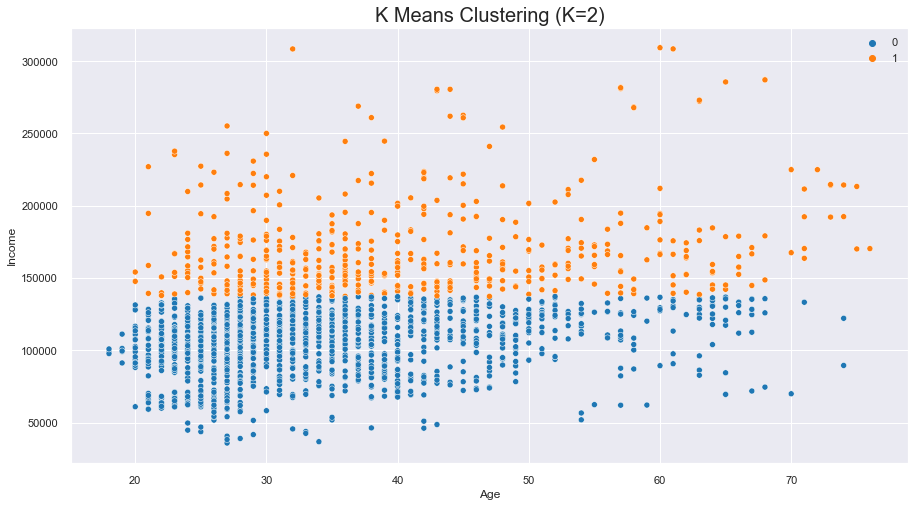

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='Age',y='Income', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
plt.legend()
plt.show()

In [31]:
#Merge Country and Cluster
cluster_k = pd.concat([df['ID'],df_cluster['cluster']], axis=1, join='outer')
cluster_k.sample(5)

,ID,cluster
541,100000542,0
1858,100001859,0
329,100000330,0
147,100000148,0
1571,100001572,0


In [32]:
#Merge to Original Data
clustered_data_k = cluster_k.merge(df, on = 'ID')
clustered_data_k.sample(5)

,ID,cluster,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1449,100001450,0,1,0,21,1,100591,0,0
1885,100001886,0,1,0,35,1,73266,0,0
1354,100001355,0,1,1,19,1,99519,1,1
1129,100001130,1,0,0,52,1,159716,1,2
7,100000008,1,0,0,35,1,193621,2,1


In [55]:
clustered_data_k[clustered_data_k.cluster == 0].ID.values

array([100000001, 100000003, 100000011, ..., 100001998, 100001999,
       100002000], dtype=int64)

In [56]:
clustered_data_k[clustered_data_k.cluster == 0].ID.count()

1489

In [57]:
clustered_data_k[clustered_data_k.cluster == 1].ID.values

array([100000002, 100000004, 100000005, 100000006, 100000007, 100000008,
       100000009, 100000010, 100000018, 100000019, 100000020, 100000022,
       100000028, 100000030, 100000031, 100000033, 100000035, 100000037,
       100000041, 100000044, 100000045, 100000046, 100000047, 100000052,
       100000057, 100000058, 100000059, 100000063, 100000064, 100000066,
       100000068, 100000071, 100000073, 100000075, 100000076, 100000078,
       100000079, 100000081, 100000088, 100000089, 100000095, 100000096,
       100000100, 100000106, 100000107, 100000108, 100000109, 100000110,
       100000114, 100000117, 100000119, 100000120, 100000122, 100000129,
       100000131, 100000132, 100000135, 100000137, 100000142, 100000143,
       100000146, 100000150, 100000153, 100000154, 100000155, 100000159,
       100000164, 100000166, 100000168, 100000173, 100000176, 100000181,
       100000182, 100000184, 100000187, 100000191, 100000196, 100000200,
       100000201, 100000206, 100000210, 100000213, 

In [59]:
clustered_data_k[clustered_data_k.cluster == 1].ID.count()

511

## Hierical Clustering

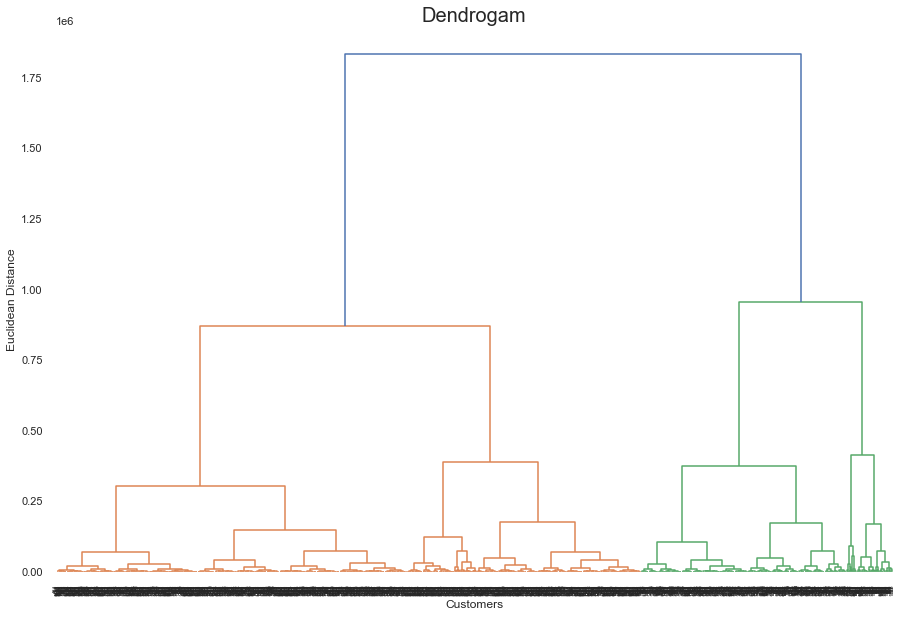

In [37]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df1.iloc[:, [1, 2, 3, 4]], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_cluster.drop(labels=['cluster'],axis=1))

In [39]:
df_cluster['cluster_hc']=cluster_hc

In [40]:
df_cluster

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,cluster_hc
0,0,0,67,2,124670,1,2,0,1
1,1,1,22,1,150773,1,2,1,0
2,0,0,49,1,89210,0,0,0,1
3,0,0,45,1,171565,1,1,1,0
4,0,0,53,1,149031,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0,1
1996,1,1,27,1,117744,1,0,0,1
1997,0,0,31,0,86400,0,0,0,1
1998,1,1,24,1,97968,0,0,0,1


In [42]:
hasilk=df_cluster.groupby(['cluster']).agg({'Sex':'mean', 'Marital status':'mean', 'Age':'mean','Education':'mean',
                                           'Income':'mean', 'Occupation':'mean', 'Settlement size':'mean'}).reset_index()
hasilk

,cluster,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.513096,0.519812,34.024849,0.980524,103932.662189,0.614506,0.550705
1,1,0.293542,0.428571,41.399217,1.205479,170554.019569,1.381605,1.287671


In [43]:
hasilhc=df_cluster.groupby(['cluster_hc']).agg({'Sex':'mean', 'Marital status':'mean', 'Age':'mean','Education':'mean',
                                           'Income':'mean', 'Occupation':'mean', 'Settlement size':'mean'}).reset_index()
hasilhc

,cluster_hc,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0.307820,0.437604,41.439268,1.221298,165204.427621,1.322795,1.259567
1,1,0.521086,0.521801,33.533238,0.959257,101944.944246,0.590422,0.515368


In [44]:
df1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,cluster_hc
0,0,0,67,2,124670,1,2,0,1
1,1,1,22,1,150773,1,2,1,0
2,0,0,49,1,89210,0,0,0,1
3,0,0,45,1,171565,1,1,1,0
4,0,0,53,1,149031,1,1,1,0


In [49]:
cluster_hc1 = pd.concat([df['ID'],df_cluster['cluster_hc']], axis=1, join='outer')
cluster_hc1.sample(5)

,ID,cluster_hc
417,100000418,0
446,100000447,1
1961,100001962,1
1403,100001404,1
222,100000223,1


In [50]:
#Merge to Original Data
clustered_data_hc = cluster_hc1.merge(df, on = 'ID')
clustered_data_hc.sample(5)

,ID,cluster_hc,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
931,100000932,1,1,1,22,1,109676,1,0
1860,100001861,1,1,1,43,1,48632,0,0
1953,100001954,1,0,0,33,0,118144,1,0
1086,100001087,0,1,1,30,3,169002,2,2
1801,100001802,1,0,0,53,1,124902,1,0


In [51]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].ID.values

array([100000002, 100000004, 100000005, 100000006, 100000007, 100000008,
       100000009, 100000010, 100000018, 100000019, 100000020, 100000022,
       100000024, 100000028, 100000030, 100000031, 100000033, 100000035,
       100000037, 100000041, 100000043, 100000044, 100000045, 100000046,
       100000047, 100000052, 100000055, 100000057, 100000058, 100000059,
       100000063, 100000064, 100000066, 100000068, 100000071, 100000073,
       100000074, 100000075, 100000076, 100000078, 100000079, 100000081,
       100000082, 100000086, 100000088, 100000089, 100000095, 100000096,
       100000097, 100000098, 100000100, 100000106, 100000107, 100000108,
       100000109, 100000110, 100000114, 100000115, 100000117, 100000119,
       100000120, 100000122, 100000124, 100000129, 100000131, 100000132,
       100000135, 100000137, 100000142, 100000143, 100000146, 100000149,
       100000150, 100000153, 100000154, 100000155, 100000159, 100000164,
       100000166, 100000168, 100000173, 100000176, 

In [52]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].ID.count()

601

In [53]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].ID.values

array([100000001, 100000003, 100000011, ..., 100001998, 100001999,
       100002000], dtype=int64)

In [54]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].ID.count()

1399